# SLU9 - Regression: Exercise notebook

In [1]:
import pandas as pd
import numpy as np

In this notebook you will practice the following:
* Gradient Descent
* Simple Linear Regression
* Multiple Linear Regression
* Using scikit learn linear regression implementations

If this is the first time, in a long time, that you see mathematical notation, do not despair. TODO
* $\beta_0$, $\beta_1$, ..., $\beta_K$: these are the parameters of your model that you will 
* $\sum_{n=0}^N$ means that you will sum all TODO

## Simple Linear Regression & Gradient Descent

#### Simple Linear Regression formula

For starters, let's implement the line equation ($\hat{y} = \beta_0 + \beta_1 x$) in the method bellow. You will receive a 

In [2]:
def simple_linear_regression_output(x, b0, b1):
    """
    Args:
        x : pandas.Series with shape (num_observations, 1)
            The input data to be used in y_hat.
        b0 : float
            The intercept in y_hat.
        b1 : float
            The coefficient in y_hat.
    
    Returns:
        y_hat : numpy.array with shape
            The prediction made by the simple linear regression.
    """
    y_hat = b0 + b1 * x
    
    return y_hat

#### Mean Squared Error

$$MSE = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2 = \sum_{n=1}^N (y_n - (\beta_0 + \beta_1 x_n))^2$$

In [3]:
def mean_squared_error(y, y_hat):
    """
    Args: 
        y : pandas.Series
            The targets.
        y_hat : pandas.Series
            The predictions made by a simple linear regression.
    
    Returns:
        mse : pandas.Series
            Mean Squared Error between y and y_hat
    """
    #1) Perform the difference
    e = (y - y_hat)
    
    #2) Now, square the difference
    s = e ** 2
    
    #3) Finally, take the mean.
    m = s.mean()
    
    return m

#### Simple Linear Regression partial derivatives

$$\frac{\partial MSE}{\partial b_0} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n) $$

$$\frac{\partial MSE}{\partial b_1} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n)x_n $$

In [111]:
def simple_linear_regression_gradient(x, y, b0, b1):
    """
    Args:
        x : pandas.Series with shape (num_observations, 1)
            The input data to be used in y_hat. 
        y : pandas.Series with shape (num_observations, 1)
            TODO
        b0 : float
            The intercept in y_hat.
        b1 : float
            The coefficient in y_hat.
    
    Returns:
        dMSE_db0 : TODO
        dMSE_db1 : TODO
    """
    # 1) Get the predictions.
    y_hat = simple_linear_regression_output(x, b0, b1)
    
    # 2) Compute the difference between the targets and 
    #    the predictions.
    y_dif = y - y_hat
    
    # 3) Perform the mean as in the formula.
    dMSE_db0 = -(2 * y_dif).mean()
    
    # 4) Same thing as 'dMSE_db0' but this time you must 
    #    account for the input 'x'.
    dMSE_db1 = -((2 * y_dif) * x).mean()
    
    return dMSE_db0, dMSE_db1

#### Adjusting Simple Linear Regression $\beta_0$ and $\beta_1$ parameters with gradient descent

1. _For epoch in 1...epochs:_
    1. $d_y = (y - \hat{y})$
    2. $\beta_0 = \beta_0 - \alpha \frac{\partial MSE}{\partial \beta_0} = \beta_0 + \alpha \frac{1}{N} \sum_{n=1}^N 2 d_y$ 
    3. _For i in 1..K:_
        1. $\beta_i = \beta_i - \alpha \frac{\partial MSE}{\partial \beta_i} = \beta_i + \alpha \frac{1}{N} \sum_{n=1}^N 2 d_y x_{i_n}$ 

In [50]:
def simple_linear_regression_gradient_descent(x, y, b0, b1, learning_rate, epochs): 
    """
    Args:
        x : pandas.Series
            TODO
        x : pandas.Series
            TODO
        b0 : float
            TODO
        b1 : float
            TODO
        learning_rate : float
            TODO
        epochs : integer
            TODO
    
    Returns
        b0 : float
            TODO
        b1 : float
            TODO
    """
    # 1) For a number of epochs:
    for epoch in range(epochs):
        # 1.1) Get the gradients
        dMSE_db0, dMSE_db1 = simple_linear_regression_gradient(x, y, b0, b1)
        
        # 1.2) Change b0
        b0 = b0 - learning_rate * dMSE_db0
        
        # 1.3) Change b1
        b1 = b1 - learning_rate * dMSE_db1
        
    return b0, b1

#### Adjusting Simple Linear Regression $\beta_0$ and $\beta_1$ parameters with stochastic gradient descent

1. _For epoch in 1...epochs:_
    1. _X' = shuffle(X)_
    2. _For each $x_n$ in $X'$_:
        1. $b_0 = b_0 - \alpha \frac{\partial SE}{\partial b_0} = b_0 + 2 \alpha (y - \hat{y})$
        2. $b_1 = b_1 - \alpha \frac{\partial SE}{\partial b_1} = b_1 + 2 \alpha (y - \hat{y})x_n$

In [112]:
from sklearn.utils import check_random_state

def simple_linear_regression_stochastic_gradient_descent(x, y, b0, b1, learning_rate, epochs, random_state): 
    """
    """
    # TODO
    # ) Create a random numbers generator using TODO
    random_state = check_random_state(random_state)
    
    # ) TODO
    data = pd.concat(
        (x.to_frame(), y.to_frame()), 
        axis=1)
    data.columns = ['x', 'y']
    
    for epoch in range(epochs):
        # Get a shuffled version of x
        data_ = data.sample(n=data.shape[0], random_state=random_state)
        x_ = data['x']
        y_ = data['y']
        for n in range(x.shape[0]): 
            dMSE_db0, dMSE_db1 = simple_linear_regression_gradient(x_.iloc[[n]], y_.iloc[[n]], b0, b1)
            
            b0 = b0 - learning_rate * dMSE_db0

            b1 = b1 - learning_rate * dMSE_db1
    
    return b0, b1

In [108]:
b0, b1 = -1, -1

xx = StandardScaler().fit_transform(x[['RM']])
xx = pd.Series(xx[:, 0])

simple_linear_regression_stochastic_gradient_descent(x['RM'], y, b0, b1, 0.01, 50, 10)

(-11.590892497548133, 4.163402926925734)

## Multiple Linear Regression

#### Multiple Linear Regression formula

$$\hat{y} = \beta_0 + \sum_{i=0}^K \beta_i$$

In [8]:
def multiple_linear_regression_output(x, betas):
    """
    Args:
        x : pandas.DataFrame with shape (num_observations, num_features)
            TODO
        betas : pandas.Series with shape (num_features, 1)
            TODO
    
    Returns:
        y_hat : numpy.array with shape
            The prediction made by the simple linear regression.
    """
    # 1) TODO
    betas = betas.values.reshape((betas.shape[0], 1))
    
    # 2) TODO
    dot_product = x.dot(betas)
    
    # 3) TODO
    y_hat = betas[0] + dot_product
    
    # 3) TODO
    y_hat = y_hat[0]
    
    return y_hat

#### Multiple Linear Regression partial derivatives

$$\frac{\partial MSE}{\partial b_0} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n) $$

$$\frac{\partial MSE}{\partial b_1} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n)x_{1_n} $$

$$...$$

$$\frac{\partial MSE}{\partial b_K} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n)x_{K_n} $$

In [144]:
def multiple_linear_regression_gradient(x, y, betas):
    """
    Args:
        x : pandas.DataFrame with shape (num_observations, num_features)
            TODO
        y : pandas.Series with shape (num_observations,)
            TODO
        betas : pandas.Series with shape (num_features,)
            TODO
    
    Returns:
        dMSE_dbetas : pandas.Series shape (num_features + 1,)
            TODO
    """
    # TODO
    # 1) Get the predictions.
    y_hat = multiple_linear_regression_output(x, betas)
    
    # 2) Compute the difference between the targets and 
    #    the predictions.
    y_dif = y - y_hat
    
    dMSE_dbetas = np.zeros((x.shape[1], 1))
    print(dMSE_dbetas.shape)
    
    # 3) TODO
    dMSE_dbetas[0] = -(2 * y_dif).mean()
    
    # 4) TODO
    for k, col in enumerate(x.columns): 
        dMSE_dbetas[k] = -((2 * y_dif) * x[col]).mean()
    
    return pd.Series(dMSE_dbetas[:, 0])

In [174]:
betas = pd.Series(np.random.rand(x.shape[1],))

xx = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
multiple_linear_regression_gradient(xx, y, betas)

(13, 1)


0      9.156965
1     -8.161142
2     12.002653
3     -1.295976
4     10.698392
5    -13.182164
6      9.520660
7     -6.930527
8      9.728896
9     11.467462
10    11.015124
11    -6.754270
12    15.805320
dtype: float64

#### Adjusting Multiple Linear Regression $\beta_i, 0 \leq i \leq K$  parameters with gradient descent

#### Adjusting Multiple Linear Regression $\beta_i, 0 \leq i \leq K$  parameters with stochastic gradient descent

## Using scikit learn linear regression implementations

In [9]:
from sklearn.datasets import load_boston

data = load_boston()

x = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

In [10]:
from sklearn.linear_model import SGDRegressor

learning_rate = 0.001
epochs = 10000

lr1 = SGDRegressor(random_state=10, 
                   penalty=None, 
                   shuffle=True, 
                   learning_rate='constant', 
                   eta0=learning_rate, 
                   max_iter=epochs)

lr1.fit(x, y)

print('score: {}'.format(lr1.score(x, y)))
print(lr1.coef_)

score: -2.5315198275527102e+26
[ 1.02627826e+11  3.66158081e+11 -5.04101460e+11 -1.96573916e+10
 -1.53194028e+11  3.94680454e+11  1.44583612e+11 -4.71698425e+10
  1.05109051e+11  2.60591566e+11  2.42687945e+10  6.45655956e+10
 -1.10882876e+11]


In [11]:
from sklearn.preprocessing import StandardScaler


learning_rate = 0.001
epochs = 1000

lr1 = SGDRegressor(random_state=10, 
                   penalty=None, 
                   shuffle=True, 
                   learning_rate='constant', 
                   eta0=learning_rate, 
                   max_iter=epochs)

scaler = StandardScaler()

x_ = scaler.fit_transform(x)

lr1.fit(x_, y)

print('score: {}'.format(lr1.score(x_, y)))
print(lr1.coef_)

score: 0.7395627209759178
[-0.87655783  1.06583781  0.17346109  0.64924857 -2.03868254  2.63270943
  0.05614245 -3.13957329  2.70956499 -2.04100582 -2.02340401  0.82869527
 -3.70319134]


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr2 = LinearRegression()

lr2.fit(x, y)

print('score: {}'.format(lr2.score(x, y)))
print(lr2.coef_)

score: 0.7406077428649427
[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


In [14]:
simple_linear_regression_gradient(x['RM'], y, 1, -1)

(-55.6348814229249, -359.5994104624505)

In [41]:
b0, b1 = 1, -1

In [42]:
b0, b1 = simple_linear_regression_gradient_descent(x['RM'], y, b0, b1, 0.01, 10000)

In [43]:
b0, b1

(-31.388593536020867, 8.586157660135266)

In [44]:
import matplotlib.pyplot as plt

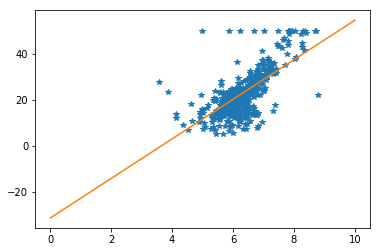

In [45]:
plt.plot(x['RM'], y, '*')

xx = np.linspace(0, 10, x.shape[0])
yy = (b0 + b1 * xx)

plt.plot(xx, yy)

In [47]:
learning_rate = 0.001
epochs = 1000

lr1 = SGDRegressor(random_state=10, 
                   penalty=None, 
                   shuffle=True, 
                   learning_rate='constant', 
                   eta0=learning_rate, 
                   max_iter=epochs)

lr1.fit(x[['RM']], y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.001,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty=None,
       power_t=0.25, random_state=10, shuffle=True, tol=None, verbose=0,
       warm_start=False)

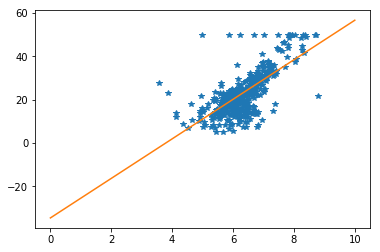

In [48]:
plt.plot(x['RM'], y, '*')
xx = np.array([np.linspace(0, 10, x.shape[0])]).T
yy = lr1.predict(xx)
plt.plot(xx, yy)

In [49]:
lr1.coef_

array([9.12510576])